<a href="https://colab.research.google.com/github/Rigboone-68/Dark-Matter-Analysis/blob/main/Basic_EDA_IllustrisTNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install tarfile

ERROR: Could not find a version that satisfies the requirement tarfile (from versions: none)
ERROR: No matching distribution found for tarfile


In [14]:
import tarfile
import os

# Replace with the path to your .tar.gz file
tar_file_path = '/content/drive/My Drive/dataset/fof_subhalo_tab_099.tar.gz'
extract_dir = "/content/extracted_data"

# Extract the .tar.gz file
with tarfile.open(tar_file_path, "r:gz") as tar_ref:
    tar_ref.extractall(extract_dir)

print("Files extracted to:", extract_dir)


Files extracted to: /content/extracted_data


In [15]:
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)


Extracted files: ['fof_subhalo_tab_099.544.hdf5', 'fof_subhalo_tab_099.95.hdf5', 'fof_subhalo_tab_099.620.hdf5', 'fof_subhalo_tab_099.36.hdf5', 'fof_subhalo_tab_099.679.hdf5', 'fof_subhalo_tab_099.417.hdf5', 'fof_subhalo_tab_099.612.hdf5', 'fof_subhalo_tab_099.306.hdf5', 'fof_subhalo_tab_099.140.hdf5', 'fof_subhalo_tab_099.646.hdf5', 'fof_subhalo_tab_099.12.hdf5', 'fof_subhalo_tab_099.281.hdf5', 'fof_subhalo_tab_099.170.hdf5', 'fof_subhalo_tab_099.126.hdf5', 'fof_subhalo_tab_099.362.hdf5', 'fof_subhalo_tab_099.72.hdf5', 'fof_subhalo_tab_099.9.hdf5', 'fof_subhalo_tab_099.604.hdf5', 'fof_subhalo_tab_099.307.hdf5', 'fof_subhalo_tab_099.505.hdf5', 'fof_subhalo_tab_099.444.hdf5', 'fof_subhalo_tab_099.272.hdf5', 'fof_subhalo_tab_099.638.hdf5', 'fof_subhalo_tab_099.552.hdf5', 'fof_subhalo_tab_099.243.hdf5', 'fof_subhalo_tab_099.530.hdf5', 'fof_subhalo_tab_099.510.hdf5', 'fof_subhalo_tab_099.629.hdf5', 'fof_subhalo_tab_099.563.hdf5', 'fof_subhalo_tab_099.8.hdf5', 'fof_subhalo_tab_099.449.hdf5'

In [19]:
with h5py.File(hdf5_file_path, 'r') as hdf_file:
    print("Keys in the HDF5 file:", list(hdf_file.keys()))


Keys in the HDF5 file: ['Config', 'Group', 'Header', 'IDs', 'Parameters', 'Subhalo']


In [20]:
with h5py.File(hdf5_file_path, 'r') as hdf_file:
    for key in hdf_file.keys():
        print(f"Key: {key}")
        if isinstance(hdf_file[key], h5py.Group):
            print(f"{key} is a group containing:", list(hdf_file[key].keys()))
        elif isinstance(hdf_file[key], h5py.Dataset):
            print(f"{key} is a dataset with shape {hdf_file[key].shape}")


Key: Config
Config is a group containing: []
Key: Group
Group is a group containing: ['GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200']
Key: Header
Header is a group containing: []
Key: IDs
IDs is a group containing: []
Key: Parameters
Parameters is a group containing: []
Key: Subhalo
Subhalo is a group containing: ['SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloFlag', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', '

In [21]:
with h5py.File(hdf5_file_path, 'r') as hdf_file:
    group_mass = hdf_file['Group/GroupMass'][:]
    print("Group Mass Data:", group_mass)


Group Mass Data: [0.0003141  0.00030987 0.00029736 ... 0.00126745 0.00028815 0.00141389]


In [22]:
import pandas as pd

group_mass_df = pd.DataFrame(group_mass, columns=['GroupMass'])
group_mass_df.to_csv('group_mass.csv', index=False)


In [25]:
!pip install pyspark

In [26]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()

df = spark.read.csv("group_mass.csv", header=True, inferSchema=True)
df.show()

+------------+
|   GroupMass|
+------------+
|3.1409838E-4|
|  3.09872E-4|
| 2.973568E-4|
|0.0012917178|
|5.2062125E-4|
|3.0868815E-4|
| 3.085548E-4|
|0.0014138914|
|3.0470247E-4|
| 3.092903E-4|
|2.9193296E-4|
|  0.00131652|
|0.0014138914|
|3.1148712E-4|
|3.3804929E-4|
|2.9010116E-4|
|0.0012660834|
|0.0014138914|
|0.0012233944|
|0.0012661999|
+------------+
only showing top 20 rows



 Histogram for GroupMass

What to look for:

The shape of the distribution: Is it normal (bell-shaped), skewed, or uniform?
The range: What are the minimum and maximum mass values?
Peaks: Where are most galaxy groups clustered in terms of mass?
What it means:

A skewed distribution (e.g., more low-mass groups) suggests most galaxy groups in the dataset are small, which is expected in cosmic simulations.

Outliers at the high-mass end might represent clusters or rare massive galaxies.

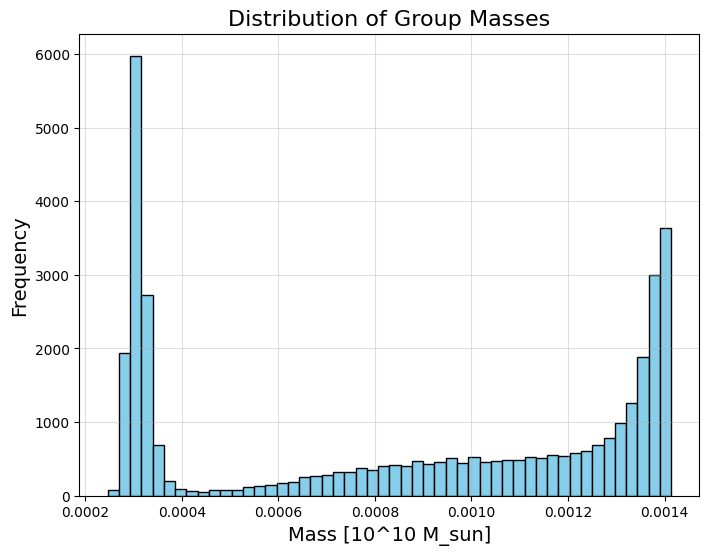

In [30]:
import matplotlib.pyplot as plt
import h5py

# Load the GroupMass data
with h5py.File(hdf5_file_path, 'r') as hdf_file:
    group_mass = hdf_file['Group/GroupMass'][:]

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(group_mass, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Group Masses', fontsize=16)
plt.xlabel('Mass [10^10 M_sun]', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(alpha=0.4)
plt.show()


 Scatter Plot: GroupMass vs. Group_R_Crit200

What to look for:

The trend: Does mass increase with radius?
Any clusters or outliers: Are there galaxy groups that deviate significantly?

Spread: Is the relationship tight (strong correlation) or loose (weak correlation)?

What it means:

A positive trend (mass increases with radius) aligns with physics: larger groups tend to have more mass.

Outliers might indicate unusual or unique groups worth further investigation.

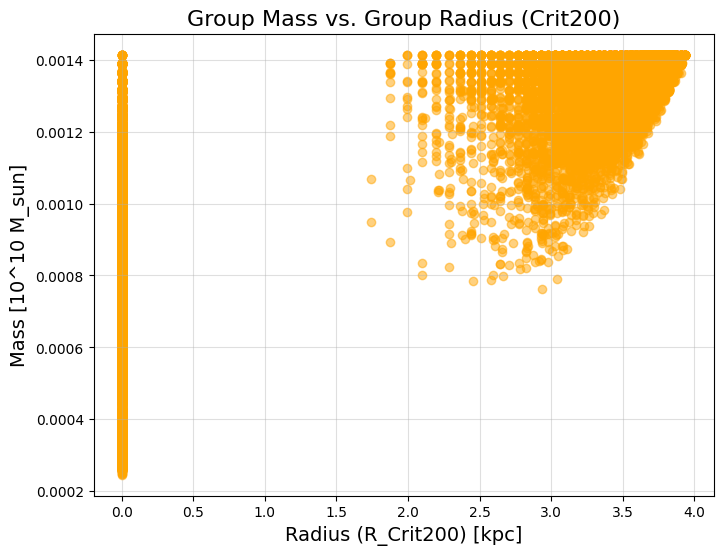

In [31]:
# Load additional data
with h5py.File(hdf5_file_path, 'r') as hdf_file:
    group_radius = hdf_file['Group/Group_R_Crit200'][:]

# Plotting scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(group_radius, group_mass, alpha=0.5, color='orange')
plt.title('Group Mass vs. Group Radius (Crit200)', fontsize=16)
plt.xlabel('Radius (R_Crit200) [kpc]', fontsize=14)
plt.ylabel('Mass [10^10 M_sun]', fontsize=14)
plt.grid(alpha=0.4)
plt.show()


 Correlation Heatmap

What to look for:

Values close to +1 or -1: Strong positive or negative correlations.

Near 0: No correlation between the variables.

What it means:

For example:
High correlation (e.g., GroupMass vs. Group_R_Crit200): Suggests that larger groups are indeed more massive.

Low correlation (e.g., GroupSFR vs. GroupVel_X): These might be unrelated processes.

This helps identify which properties to focus on in your research.

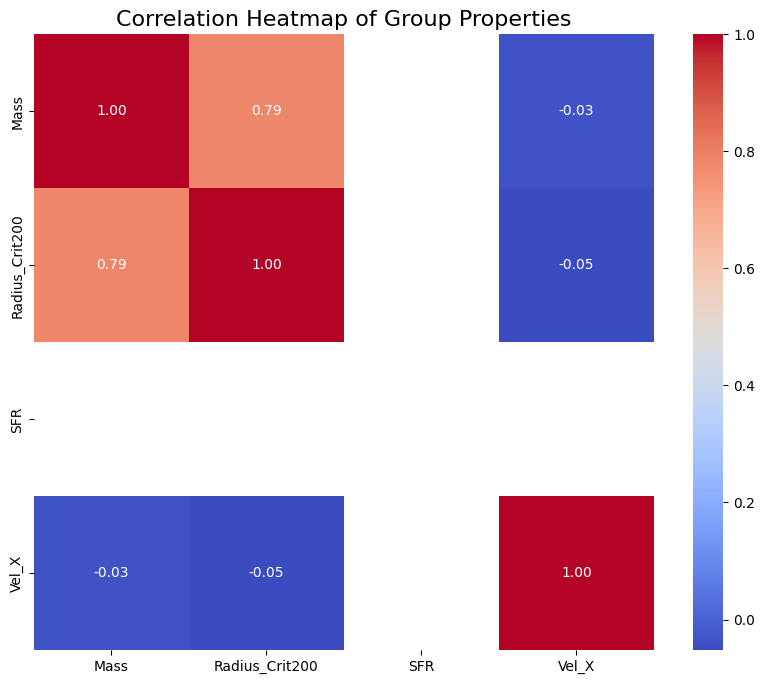

In [32]:
import seaborn as sns
import numpy as np

# Assuming you load other parameters similarly:
with h5py.File(hdf5_file_path, 'r') as hdf_file:
    group_sfr = hdf_file['Group/GroupSFR'][:]
    group_vel = hdf_file['Group/GroupVel'][:, 0]  # Example for the x-component of velocity

# Combine into a DataFrame
import pandas as pd
data = pd.DataFrame({
    'Mass': group_mass,
    'Radius_Crit200': group_radius,
    'SFR': group_sfr,
    'Vel_X': group_vel
})

# Compute correlation matrix
corr_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Group Properties', fontsize=16)
plt.show()


Density Plot: SubhaloMass

What to look for:

Peaks: Where is the density highest (i.e., most common subhalo mass)?

Tails: Are there many extremely high-mass or low-mass subhalos?

Shape: Is it smooth, multimodal, or skewed?

What it means:

Peaks indicate the "average" or most common subhalo size.

A long tail to the right suggests rare, very massive subhalos that could be hosting bright galaxies or galaxy clusters.

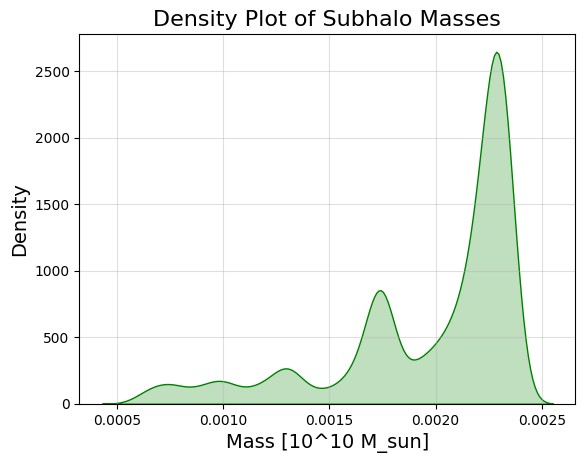

In [33]:
# Load SubhaloMass data
with h5py.File(hdf5_file_path, 'r') as hdf_file:
    subhalo_mass = hdf_file['Subhalo/SubhaloMass'][:]

# Density plot
sns.kdeplot(subhalo_mass, color='green', fill=True)
plt.title('Density Plot of Subhalo Masses', fontsize=16)
plt.xlabel('Mass [10^10 M_sun]', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(alpha=0.4)
plt.show()


In [34]:
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(
    x=group_radius,
    y=group_mass,
    labels={'x': 'Radius (R_Crit200)', 'y': 'Mass (10^10 M_sun)'},
    title='Interactive Plot: Group Mass vs. Radius'
)
fig.show()
